In [10]:
from sympy import symbols, Symbol, Function, Eq, solve, diff
import numpy as np
from matplotlib import pyplot as plt

# Greeks of a Constant Product AMM

## Definitions

### Greeks

The present value of any derivative is denote by $PV(x,t)$ where $S$ is the spot price. We define **Theta** as the change in value over time if nothing else changes aka the time decay

$$
\Theta(S,t) = \frac{\partial PV(S, t)}{\partial t}
$$



We then define the **Delta** (also **Risk Asset Delta** because it is measured in units of the risk asset) as

$$
\Delta(S,t) = \frac{\partial PV(S, t)}{\partial S}
$$

If we multiply the Delta with $S$ we obtain the **Cash Delta** that is measured in units of cash

$$
\Delta_c(S,t) = S \Delta(S,t) = S\frac{\partial PV(S, t)}{\partial S}
$$

The change in Delta with respect to $S$ is known as **Gamma**

$$
\Gamma(S,t) = \frac{\partial \Delta(S, t)}{\partial S} = \frac{\partial^2 PV(S, t)}{\partial x^2}
$$

Gamma has awkward units, so often it makes sense to look at the **Cash Gamma** which is expressed in units of cash

$$
\Gamma_c(S,t) = S^2\frac{\partial \Delta(S, t)}{\partial S} = S^2\frac{\partial^2 PV(S, t)}{\partial S^2}
$$

We also sometimes (rarely) look at the **Risk Asset Gamma** which as the name implies is expressed in units of the risk asset

$$
\Gamma_r(S,t) = S\frac{\partial \Delta(S, t)}{\partial S} = S\frac{\partial^2 PV(S, t)}{\partial S^2}
$$

### Constant product AMM

In a constant product AMM, the **cash** holdings $y$ and the **risk asset** holding satisfy the following invariant equation with the pool constant **k**

$$
k=x\cdot y
$$

Separating $y$ yields

$$
y=\frac k x
$$

The **marginal price** is then by the function below

$$
p_{marg} = -\frac{dy}{dx} = \frac k {x^2} = \frac y x
$$

In [11]:
k_val=1000
x_r=np.linspace(4,20,10000)
y_r=k_val/x_r
p_r=k_val/(x_r*x_r)
p2_r=y_r/x_r
delta_cash_r = y_r
delta_r = y_r / p_r

ddelta_r1 = np.diff(delta_r)
dp_r1 = np.diff(p_r)

gamma_r1 = -ddelta_r1/dp_r1
p_r1 = p_r[:-1] + dp_r1
gamma_cash_r1 = gamma_r1 * p_r1**2
gamma_risk_r1 = gamma_r1 * p_r1

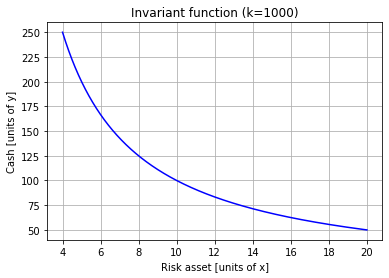

In [12]:
plt.plot(x_r, y_r, color="blue", label="invariant function")
plt.title(f"Invariant function (k={k_val})")
plt.xlabel("Risk asset [units of x]")
plt.ylabel("Cash [units of y]")
plt.grid()

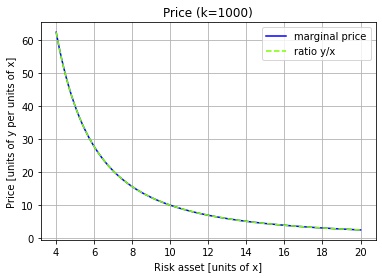

In [13]:
plt.title(f"Price (k={k_val})")
plt.xlabel("Risk asset [units of x]")
plt.ylabel("Price [units of y per units of x]")
plt.plot(x_r, p_r, color="blue", label="marginal price")
plt.plot(x_r, p2_r, color="lawngreen", linestyle="dashed", label="ratio y/x")
plt.legend()
plt.grid()

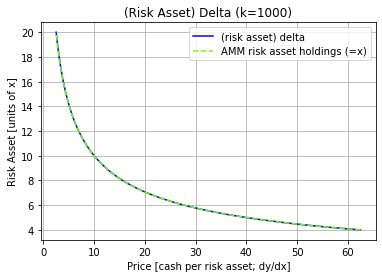

In [14]:
plt.title(f"(Risk Asset) Delta (k={k_val})")
plt.xlabel("Price [cash per risk asset; dy/dx]")
plt.ylabel("Risk Asset [units of x]")
plt.plot(p_r, delta_r, color="blue", label="(risk asset) delta")
plt.plot(p_r, x_r, color="lawngreen", linestyle="dashed", label="AMM risk asset holdings (=x)")
plt.legend()
plt.grid()

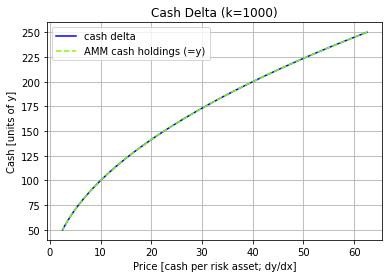

In [15]:
plt.title(f"Cash Delta (k={k_val})")
plt.xlabel("Price [cash per risk asset; dy/dx]")
plt.ylabel("Cash [units of y]")
plt.plot(p_r, delta_cash_r, color="blue", label="cash delta")
plt.plot(p_r, y_r, color="lawngreen", linestyle="dashed", label="AMM cash holdings (=y)")
plt.legend()
plt.grid()

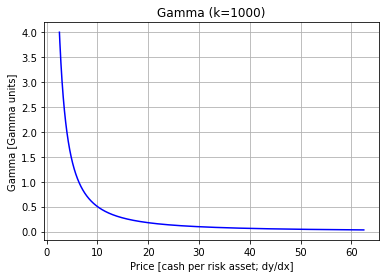

In [16]:
plt.title(f"Gamma (k={k_val})")
plt.xlabel("Price [cash per risk asset; dy/dx]")
plt.ylabel("Gamma [Gamma units]")
plt.plot(p_r1, gamma_r1, color="blue", label="gamma")
plt.grid()

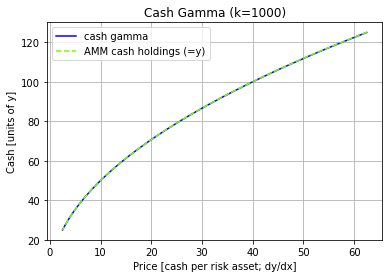

In [17]:
plt.title(f"Cash Gamma (k={k_val})")
plt.xlabel("Price [cash per risk asset; dy/dx]")
plt.ylabel("Cash [units of y]")
plt.plot(p_r1, gamma_cash_r1, color="blue", label="cash gamma")
plt.plot(p_r, 0.5*y_r, color="lawngreen", linestyle="dashed", label="AMM cash holdings (=y)")
plt.legend()
plt.grid()

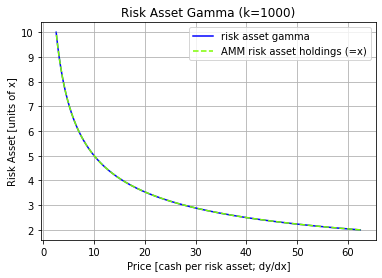

In [18]:
plt.title(f"Risk Asset Gamma (k={k_val})")
plt.xlabel("Price [cash per risk asset; dy/dx]")
plt.ylabel("Risk Asset [units of x]")
plt.plot(p_r1, gamma_risk_r1, color="blue", label="risk asset gamma")
plt.plot(p_r, 0.5*x_r, color="lawngreen", linestyle="dashed", label="AMM risk asset holdings (=x)")
plt.legend()
plt.grid()